In [4]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [5]:
#Carga de Datos
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/datosdeser.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-5a2067e19bf8>:3: DtypeWarning: Columns (3,8,9,10,15,19,25,26,27,28,31,34,35,43,45,46,48,49,50,51,52,53,54,55,56,57,58,59,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,107,120) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/datosdeser.csv')


#Limpieza

In [6]:
#Exploración Inicial de Datos Faltantes ---
print("--- 2. Exploración Inicial de Datos Faltantes ---")
# Calcular el número de valores faltantes por columna
Missing_values = data.isnull().sum()
print("\nNúmero de valores faltantes por columna:\n", Missing_values)

--- 2. Exploración Inicial de Datos Faltantes ---

Número de valores faltantes por columna:
 id                            0
file.x                        0
file.y                        0
eps                       65481
ciudad_de_residencia          0
                          ...  
data_estado                   0
data_fecha_de_admision        0
data_forma_de_pago            0
data_discapacidades       98782
fecha_de_inscripcion.y        0
Length: 146, dtype: int64


In [7]:
# Calcular el porcentaje de valores faltantes por columna
Missing_percentage = (Missing_values / len(data)) * 100
print("\nPorcentaje de valores faltantes por columna:\n", Missing_percentage)


Porcentaje de valores faltantes por columna:
 id                         0.000000
file.x                     0.000000
file.y                     0.000000
eps                       65.814680
ciudad_de_residencia       0.000000
                            ...    
data_estado                0.000000
data_fecha_de_admision     0.000000
data_forma_de_pago         0.000000
data_discapacidades       99.285377
fecha_de_inscripcion.y     0.000000
Length: 146, dtype: float64


In [8]:
# --- 3. Eliminación de Columnas con Alto Porcentaje de Datos Faltantes ---
print("\n--- 3. Eliminación de Columnas con Alto Porcentaje de Datos Faltantes ---")
# Definir el umbral para eliminar columnas (más del 50% de datos faltantes)
threshold_percentage = 50


--- 3. Eliminación de Columnas con Alto Porcentaje de Datos Faltantes ---


In [9]:
# Identificar las columnas que superan el umbral
columns_to_drop = Missing_percentage[Missing_percentage > threshold_percentage].index
print("\nColumnas identificadas para eliminar (más del {}% de faltantes):\n".format(threshold_percentage), columns_to_drop)


Columnas identificadas para eliminar (más del 50% de faltantes):
 Index(['eps', 'nivel_de_escolaridad', 'convenio', 'identidad_de_genero',
       'grupo_poblacional', 'tipo_de_desplazamiento',
       'cantidad_de_creditos_matriculados',
       'cantidad_de_creditos_matriculados_silla_vacia',
       'cantidad_de_creditos_cancelados', 'fecha_de_cancelacion_de_semestre',
       'deporte', 'pasatiempo', 'codigo_de_estado', 'fecha_de_inscripcion.x',
       'fecha_de_admision', 'segunda_opcion', 'tiene_liquidacion',
       'tiene_acceso_a_internet_desde_residencia',
       'medida_de_cantidad_de_horas_de_conexion_a_internet',
       'dispositivo_de_conexion_a_internet', 'grupo_de_sisben',
       'ciudad_de_nacimiento', 'tipo_de_identificacion_de_icfes',
       'identificacion_de_icfes', 'snp', 'icfes_matematicas', 'icfes_fisica',
       'icfes_lenguaje', 'icfes_lectura_critica', 'puntaje_entrevista',
       'estado_civil', 'regimen_salud', 'rh', 'es_victima_conflicto_armado',
       'es_vic

In [10]:
# Crear un nuevo DataFrame sin las columnas eliminadas
datosl = data.drop(columns=columns_to_drop)
print("\nDataFrame 'datosl' creado después de eliminar columnas con alto porcentaje de faltantes.")


DataFrame 'datosl' creado después de eliminar columnas con alto porcentaje de faltantes.


In [11]:
# Mostrar las columnas restantes en el DataFrame
print("\nColumnas restantes en 'datosl':\n", datosl.columns)


Columnas restantes en 'datosl':
 Index(['id', 'file.x', 'file.y', 'ciudad_de_residencia', 'direccion',
       'fecha_nacimiento', 'edad', 'colegio', 'sector_educativo',
       'codigo_de_programa', 'programa', 'metodologia', 'facultad', 'jornada',
       'codigo_snies', 'tipo_de_aspirante', 'municipio', 'comuna', 'barrio',
       'estrato', 'etnia', 'genero', 'desplazado', 'periodo', 'sede', 'estado',
       'codigo_de_estudiante', 'nivel', 'fecha_de_matricula', 'forma_de_pago',
       'numero_de_asignaturas_matriculadas',
       'numero_de_asignaturas_matriculadas_silla_vacia',
       'numero_de_asignaturas_aprobadas',
       'numero_de_asignaturas_aprobadas_silla_vacia', 'creditos_aprobados',
       'fecha_iam', 'semestre', 'file_grupos', 'Facultad',
       'forma_de_pago_agrupada', 'EdadConDefault', 'data_fecha_nacimiento',
       'data_estado_civil', 'data_rh', 'data_ciudad_de_residencia',
       'data_comuna_de_residencia', 'data_direccion', 'data_tipo_de_vivienda',
       'data_

In [12]:
# --- 4. Selección de Variables de Interés ---
print("\n--- 4. Selección de Variables de Interés ---")
# Identificar las columnas que no serán de interés para el estudio
columns_to_drop = [
    'file.x', 'id', 'file.y', 'ciudad_de_residencia', 'direccion', 'colegio', 'sector_educativo',
    'codigo_de_programa', 'codigo_snies', 'comuna', 'barrio', 'codigo_de_estudiante',
    'numero_de_asignaturas_matriculadas_silla_vacia', 'numero_de_asignaturas_aprobadas_silla_vacia',
    'fecha_iam', 'file_grupos', 'forma_de_pago_agrupada', 'EdadConDefault', 'data_estado_civil',
    'data_rh', 'data_comuna_de_residencia', 'data_direccion', 'data_edad', 'data_metodologia',
    'data_codigo_de_programa', 'data_programa', 'data_plan_de_estudio', 'data_jornada', 'data_barrio',
    'data_estrato', 'data_etnia', 'data_genero', 'data_periodo', 'data_sede', 'data_estado',
    'data_fecha_de_admision', 'data_forma_de_pago', 'fecha_de_matricula', 'periodo'
]
print("\nColumnas identificadas para eliminar por no ser de interés:\n", columns_to_drop)


--- 4. Selección de Variables de Interés ---

Columnas identificadas para eliminar por no ser de interés:
 ['file.x', 'id', 'file.y', 'ciudad_de_residencia', 'direccion', 'colegio', 'sector_educativo', 'codigo_de_programa', 'codigo_snies', 'comuna', 'barrio', 'codigo_de_estudiante', 'numero_de_asignaturas_matriculadas_silla_vacia', 'numero_de_asignaturas_aprobadas_silla_vacia', 'fecha_iam', 'file_grupos', 'forma_de_pago_agrupada', 'EdadConDefault', 'data_estado_civil', 'data_rh', 'data_comuna_de_residencia', 'data_direccion', 'data_edad', 'data_metodologia', 'data_codigo_de_programa', 'data_programa', 'data_plan_de_estudio', 'data_jornada', 'data_barrio', 'data_estrato', 'data_etnia', 'data_genero', 'data_periodo', 'data_sede', 'data_estado', 'data_fecha_de_admision', 'data_forma_de_pago', 'fecha_de_matricula', 'periodo']


In [13]:
# Eliminar las columnas no deseadas del DataFrame
datosl = datosl.drop(columns=columns_to_drop)
print("\nColumnas no deseadas eliminadas del DataFrame 'datosl'.")


Columnas no deseadas eliminadas del DataFrame 'datosl'.


In [14]:
# Mostrar las primeras filas del DataFrame resultante
print("\nPrimeras filas del DataFrame 'datosl' después de la selección de variables:\n", datosl.head())


Primeras filas del DataFrame 'datosl' después de la selección de variables:
   fecha_nacimiento  edad              programa metodologia    facultad  \
0       1997-09-12  26.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
1       1997-05-25  26.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
2       1997-07-01  26.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
3       1995-04-15  28.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
4       1977-11-16  46.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   

  jornada         tipo_de_aspirante municipio  estrato  \
0  DIURNA     TRANSFERENCIA EXTERNA  MEDELLÍN        2   
1  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN        2   
2  DIURNA  ESTUDIOS POR PRIMERA VEZ    CALDAS        3   
3  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN        3   
4  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN        3   

                       etnia  ...     forma_de_pago  \
0           Afrodescendiente  ...  RECURSOS PROPIOS   
1  Mestizo(Mayoria

In [15]:
# --- 5. Recálculo y Análisis de Datos Faltantes en el DataFrame Resultante ---
print("\n--- 5. Recálculo y Análisis de Datos Faltantes en el DataFrame Resultante ---")
# Recalcular el número de valores faltantes por columna
Missing_values = datosl.isnull().sum()
print("\nNúmero de valores faltantes por columna en 'datosl':\n", Missing_values)


--- 5. Recálculo y Análisis de Datos Faltantes en el DataFrame Resultante ---

Número de valores faltantes por columna en 'datosl':
 fecha_nacimiento                          0
edad                                  46483
programa                                  0
metodologia                               0
facultad                              46483
jornada                                   0
tipo_de_aspirante                         0
municipio                             46483
estrato                                   0
etnia                                     0
genero                                    0
desplazado                            46483
sede                                      0
estado                                19481
nivel                                 46483
forma_de_pago                         46483
numero_de_asignaturas_matriculadas    46483
numero_de_asignaturas_aprobadas       46483
creditos_aprobados                    47565
semestre                      

In [16]:
# Recalcular el porcentaje de valores faltantes por columna
Missing_percentage = (Missing_values / len(datosl)) * 100
print("\nPorcentaje de valores faltantes por columna en 'datosl':\n", Missing_percentage)


Porcentaje de valores faltantes por columna en 'datosl':
 fecha_nacimiento                       0.000000
edad                                  46.719870
programa                               0.000000
metodologia                            0.000000
facultad                              46.719870
jornada                                0.000000
tipo_de_aspirante                      0.000000
municipio                             46.719870
estrato                                0.000000
etnia                                  0.000000
genero                                 0.000000
desplazado                            46.719870
sede                                   0.000000
estado                                19.580272
nivel                                 46.719870
forma_de_pago                         46.719870
numero_de_asignaturas_matriculadas    46.719870
numero_de_asignaturas_aprobadas       46.719870
creditos_aprobados                    47.807383
semestre                     

In [17]:
# Crear un DataFrame para analizar los datos faltantes con un umbral del 10%
threshold_percentage_analysis = 10
missing_data = pd.DataFrame({
    'missing_count': Missing_values,
    'missing_percentage': Missing_percentage
})
missing_data_filtered = missing_data[missing_data['missing_percentage'] > threshold_percentage_analysis]
print("\nColumnas con más del {}% de datos faltantes en 'datosl':\n".format(threshold_percentage_analysis), missing_data_filtered)


Columnas con más del 10% de datos faltantes en 'datosl':
                                     missing_count  missing_percentage
edad                                        46483           46.719870
facultad                                    46483           46.719870
municipio                                   46483           46.719870
desplazado                                  46483           46.719870
estado                                      19481           19.580272
nivel                                       46483           46.719870
forma_de_pago                               46483           46.719870
numero_de_asignaturas_matriculadas          46483           46.719870
numero_de_asignaturas_aprobadas             46483           46.719870
creditos_aprobados                          47565           47.807383


In [18]:
# --- 6. Imputación de Valores Faltantes ---
print("\n--- 6. Imputación de Valores Faltantes ---")
# Imputar la columna 'edad' con la mediana
median_edad = datosl['edad'].median()
datosl['edad'].fillna(median_edad, inplace=True)
print("\nValores faltantes en 'edad' imputados con la mediana ({}).".format(median_edad))


--- 6. Imputación de Valores Faltantes ---

Valores faltantes en 'edad' imputados con la mediana (27.0).


<ipython-input-18-0d1e155f10d3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosl['edad'].fillna(median_edad, inplace=True)


In [19]:
# Imputar variables numéricas ('numero_de_asignaturas_matriculadas', 'numero_de_asignaturas_aprobadas', 'creditos_aprobados') con la mediana
numerical_vars_to_impute = ['numero_de_asignaturas_matriculadas', 'numero_de_asignaturas_aprobadas', 'creditos_aprobados']
for var in numerical_vars_to_impute:
    median_val = datosl[var].median()
    datosl[var].fillna(median_val, inplace=True)
    print("Valores faltantes en '{}' imputados con la mediana ({}).".format(var, median_val))

Valores faltantes en 'numero_de_asignaturas_matriculadas' imputados con la mediana (5.0).
Valores faltantes en 'numero_de_asignaturas_aprobadas' imputados con la mediana (3.0).
Valores faltantes en 'creditos_aprobados' imputados con la mediana (24.0).


<ipython-input-19-a6396bb9d954>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosl[var].fillna(median_val, inplace=True)


In [20]:
# Imputar variables categóricas con 'Desconocido'
categorical_vars_to_impute = ['facultad', 'municipio', 'desplazado', 'estado', 'nivel', 'forma_de_pago']
for var in categorical_vars_to_impute:
    datosl[var].fillna('Desconocido', inplace=True)
    print("Valores faltantes en '{}' imputados con 'Desconocido'.".format(var))

Valores faltantes en 'facultad' imputados con 'Desconocido'.
Valores faltantes en 'municipio' imputados con 'Desconocido'.
Valores faltantes en 'desplazado' imputados con 'Desconocido'.
Valores faltantes en 'estado' imputados con 'Desconocido'.
Valores faltantes en 'nivel' imputados con 'Desconocido'.
Valores faltantes en 'forma_de_pago' imputados con 'Desconocido'.


<ipython-input-20-1a37d03f3ec1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosl[var].fillna('Desconocido', inplace=True)
<ipython-input-20-1a37d03f3ec1>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Desconocido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  datosl[var].fillna('Desconocido', inplace=True)


In [21]:
# Verificar que no queden valores faltantes después de la imputación
print("\nNúmero de valores faltantes por columna después de la imputación:\n", datosl.isnull().sum())

# --- 7. Renombramiento de Columnas ---
print("\n--- 7. Renombramiento de Columnas ---")
column_mapping = {
    'edad': 'Edad',
    'estrato': 'Estrato social',
    'etnia': 'Autoreconocimiento étnico',
    'fecha_nacimiento': 'Fecha de nacimiento',
    'facultad': 'Facultad',
    'programa': 'Programa',
    'sede': 'Sede',
    'metodologia': 'Tipo de programa',
    'estado': 'Estado',
    'desplazado': 'Víctima de conflicto armado'
}
datosl.rename(columns=column_mapping, inplace=True)
print("\nColumnas renombradas:\n", datosl.columns)


Número de valores faltantes por columna después de la imputación:
 fecha_nacimiento                      0
edad                                  0
programa                              0
metodologia                           0
facultad                              0
jornada                               0
tipo_de_aspirante                     0
municipio                             0
estrato                               0
etnia                                 0
genero                                0
desplazado                            0
sede                                  0
estado                                0
nivel                                 0
forma_de_pago                         0
numero_de_asignaturas_matriculadas    0
numero_de_asignaturas_aprobadas       0
creditos_aprobados                    0
semestre                              0
Facultad                              0
data_fecha_nacimiento                 0
data_ciudad_de_residencia             0
data_tipo_de

In [22]:
# --- 8. Corrección de Errores Tipográficos e Inconsistencias ---
print("\n--- 8. Corrección de Errores Tipográficos e Inconsistencias ---")
# Convertir nombres de programas a mayúsculas y eliminar espacios extra
datosl['Programa'] = datosl['Programa'].str.upper().str.strip()
print("\nValores en la columna 'Programa' normalizados (mayúsculas y sin espacios extra).")


--- 8. Corrección de Errores Tipográficos e Inconsistencias ---

Valores en la columna 'Programa' normalizados (mayúsculas y sin espacios extra).


In [23]:
# Capitalizar los valores de 'Tipo de programa'
datosl['Tipo de programa'] = datosl['Tipo de programa'].str.capitalize()
print("\nValores en la columna 'Tipo de programa' capitalizados.")


Valores en la columna 'Tipo de programa' capitalizados.


In [24]:
# Convertir la columna 'Fecha de nacimiento' al tipo datetime
datosl['Fecha de nacimiento'] = pd.to_datetime(datosl['Fecha de nacimiento'], errors='coerce')
print("\nColumna 'Fecha de nacimiento' convertida a tipo datetime (errores convertidos a NaT).")


Columna 'Fecha de nacimiento' convertida a tipo datetime (errores convertidos a NaT).


In [25]:
# Calcular la edad en años a partir de la fecha de nacimiento
datosl['Edad'] = datosl['Fecha de nacimiento'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)
print("\nColumna 'Edad' recalculada a partir de la 'Fecha de nacimiento'.")


Columna 'Edad' recalculada a partir de la 'Fecha de nacimiento'.


In [26]:
# Categorizar las edades en rangos
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51+']
datosl['edad_rango'] = pd.cut(datosl['Edad'], bins=bins, labels=labels, right=False) # Se ajusta right=False para incluir el límite inferior
print("\nColumna 'edad_rango' creada categorizando la edad.")


Columna 'edad_rango' creada categorizando la edad.


In [27]:

# Mostrar un resumen de los datos limpios
print("\nPrimeras filas del DataFrame 'datosl' después de la limpieza y transformación:\n", datosl.head())


Primeras filas del DataFrame 'datosl' después de la limpieza y transformación:
   Fecha de nacimiento  Edad              Programa Tipo de programa  \
0          1997-09-12    28  INGENIERÍA ELÉCTRICA       Presencial   
1          1997-05-25    28  INGENIERÍA ELÉCTRICA       Presencial   
2          1997-07-01    28  INGENIERÍA ELÉCTRICA       Presencial   
3          1995-04-15    30  INGENIERÍA ELÉCTRICA       Presencial   
4          1977-11-16    48  INGENIERÍA ELÉCTRICA       Presencial   

     Facultad jornada         tipo_de_aspirante municipio  Estrato social  \
0  Ingeniería  DIURNA     TRANSFERENCIA EXTERNA  MEDELLÍN               2   
1  Ingeniería  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN               2   
2  Ingeniería  DIURNA  ESTUDIOS POR PRIMERA VEZ    CALDAS               3   
3  Ingeniería  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN               3   
4  Ingeniería  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN               3   

   Autoreconocimiento étnico  ... n

#Analisis descriptivo

In [28]:
# --- 9. Análisis Descriptivo ---
print("\n--- 9. Análisis Descriptivo ---")
# Descripción de variables numéricas
print("\nDescripción de variables numéricas:\n", datosl.describe())


--- 9. Análisis Descriptivo ---

Descripción de variables numéricas:
                  Fecha de nacimiento          Edad  Estrato social  \
count                          99493  99493.000000    99493.000000   
mean   1995-03-28 23:21:10.075281664     30.261878        1.956922   
min              1900-01-01 00:00:00      8.000000        0.000000   
25%              1992-06-09 00:00:00     26.000000        1.000000   
50%              1996-08-04 00:00:00     29.000000        2.000000   
75%              1999-08-17 00:00:00     33.000000        2.000000   
max              2017-02-18 00:00:00    125.000000        6.000000   
std                              NaN      6.462313        0.804213   

       numero_de_asignaturas_matriculadas  numero_de_asignaturas_aprobadas  \
count                        99493.000000                     99493.000000   
mean                             4.622385                         2.937051   
min                              0.000000                       

In [29]:
# Descripción de variables categóricas
print("\nDescripción de variables categóricas:\n", datosl.describe(include=['object']))


Descripción de variables categóricas:
                                  Programa Tipo de programa     Facultad  \
count                               99493            99493        99493   
unique                                 50                4            3   
top     TECNOLOGÍA EN MECÁNICA AUTOMOTRIZ       Presencial  Desconocido   
freq                                15441            90384        46483   

       jornada         tipo_de_aspirante    municipio  \
count    99493                     99493        99493   
unique       5                        12          148   
top     DIURNA  ESTUDIOS POR PRIMERA VEZ  Desconocido   
freq     44983                     55280        46483   

        Autoreconocimiento étnico     genero Víctima de conflicto armado  \
count                       99493      99493                       99493   
unique                         12          3                           3   
top     Mestizo(Mayoria Colombia)  Masculino                          

In [48]:
datosl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99350 entries, 0 to 99492
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Fecha de nacimiento                 99350 non-null  datetime64[ns]
 1   Edad                                99350 non-null  int64         
 2   Programa                            99350 non-null  object        
 3   Tipo de programa                    99350 non-null  object        
 4   jornada                             99350 non-null  object        
 5   tipo_de_aspirante                   99350 non-null  object        
 6   municipio                           99350 non-null  object        
 7   Estrato social                      99266 non-null  float64       
 8   Autoreconocimiento étnico           99350 non-null  object        
 9   genero                              99350 non-null  object        
 10  Víctima de conflicto armado

In [30]:
# --- 10. Eliminación de Columnas Duplicadas o Redundantes ---
print("\n--- 10. Eliminación de Columnas Duplicadas o Redundantes ---")
if 'Facultad' in datosl.columns:
    datosl.drop(columns=['Facultad'], inplace=True)
    print("\nColumna 'Facultad' (posible duplicado) eliminada.")
else:
    print("\nColumna 'Facultad' no encontrada en el DataFrame.")


--- 10. Eliminación de Columnas Duplicadas o Redundantes ---

Columna 'Facultad' (posible duplicado) eliminada.


In [31]:
# --- 11. Filtrado de Datos Atípicos ---
print("\n--- 11. Filtrado de Datos Atípicos ---")
# Filtrar edades razonables (entre 15 y 65 años)
datosl = datosl[(datosl['Edad'] >= 15) & (datosl['Edad'] <= 65)]
print("\nFiltrado de estudiantes con edades entre 15 y 65 años.")


--- 11. Filtrado de Datos Atípicos ---

Filtrado de estudiantes con edades entre 15 y 65 años.


In [32]:
# Limpiar la columna 'Estrato social' (reemplazar valores 0 con NaN)
datosl['Estrato social'] = datosl['Estrato social'].replace(0, np.nan)
print("\nValores 0 en 'Estrato social' reemplazados con NaN.")


Valores 0 en 'Estrato social' reemplazados con NaN.


<ipython-input-32-96725623376f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosl['Estrato social'] = datosl['Estrato social'].replace(0, np.nan)


In [33]:
# --- 12. Creación de Variable Binaria para Deserción (Refinada) ---
print("\n--- 12. Creación de Variable Binaria para Deserción (Refinada) ---")
# Definir los estados considerados como deserción
estados_desertores = [
    'Retiro Académico',
    'Cancelación reglamentaria',
    'Retiro Definitivo',
    'Retiro Voluntario por Cambio de programa'
]


--- 12. Creación de Variable Binaria para Deserción (Refinada) ---


In [34]:
# Crear la variable binaria 'desertor': 1 si desertó, 0 si no, NaN si no se puede determinar
datosl['desertor'] = datosl['Estado'].apply(
    lambda x: 1 if x in estados_desertores else (0 if x in [
        'Matriculado', 'Aprobado', 'Egresado', 'Graduado', 'Matricula Especial'] else None)
)
print("\nVariable binaria 'desertor' creada (1=Desertó, 0=No Desertó, NaN=Indeterminado).")
print("\nDistribución de la variable 'desertor':\n", datosl['desertor'].value_counts(dropna=False))


Variable binaria 'desertor' creada (1=Desertó, 0=No Desertó, NaN=Indeterminado).

Distribución de la variable 'desertor':
 desertor
NaN    44438
0.0    35470
1.0    19442
Name: count, dtype: int64


In [35]:
# --- 13. Exploración de Variables Categóricas ---
print("\n--- 13. Exploración de Variables Categóricas ---")
# Ver valores únicos en la columna 'municipio'
municipios_unicos = datosl['municipio'].unique()
print("\nValores únicos en la columna 'municipio':\n", municipios_unicos)


--- 13. Exploración de Variables Categóricas ---

Valores únicos en la columna 'municipio':
 ['MEDELLÍN' 'CALDAS' 'CONCORDIA' 'BELLO' 'ENVIGADO' 'APARTADÓ'
 'COPACABANA' 'ITAGÜÍ' 'CALI' 'GIRARDOTA' 'LA UNIÓN' 'AMAGÁ' 'SABANETA'
 'RIONEGRO' 'CAUCASIA' 'SAN JERÓNIMO' 'MONTELÍBANO' 'LA ESTRELLA'
 'CISNEROS' 'LA CEJA' 'GUARNE' 'SAN SEBASTIÁN DE MARIQUITA' 'BARBOSA'
 'EBÉJICO' 'SAN VICENTE FERRER' 'SAN PEDRO DE LOS MILAGROS'
 'SAN CRISTÓBAL' 'URRAO' 'EL BAGRE' 'SOPETRÁN' 'MUTATÁ'
 'SAN VICENTE DE CHUCURÍ' 'PROVIDENCIA' 'BELMIRA' 'PUERTO BERRÍO'
 'SAN LUIS' 'EL CARMEN DE VIBORAL' 'MARINILLA' 'TÁMESIS' 'SAN PEDRO'
 'SAN ANDRÉS' 'VENECIA' 'PUERTO NARE' 'OLAYA' 'NECOCLÍ' 'GUATAPÉ' 'TAME'
 'SANTA ROSA DE OSOS' 'PUERTO TRIUNFO' 'YARUMAL' 'TARSO' 'CAREPA'
 'SANTO DOMINGO' 'DONMATÍAS' 'SAN ANDRÉS DE TUMACO' 'PUERTO BOYACÁ'
 'ENTRERRÍOS' 'LIBORINA' 'SABANALARGA' 'YOLOMBÓ' 'CAÑASGORDAS' 'GUADALUPE'
 'ANORÍ' 'GÓMEZ PLATA' 'CAROLINA' 'SANTA FÉ DE ANTIOQUIA' 'GIRALDO'
 'SANTA MARTA' 'REMEDIOS' 'HISPANI


--- 14. Visualización de Distribuciones ---


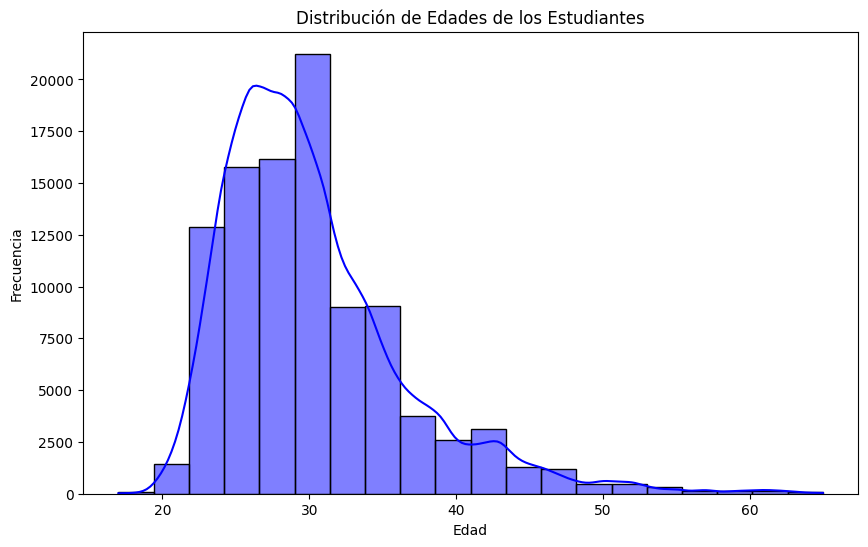

In [36]:
# --- 14. Visualización de Distribuciones ---
print("\n--- 14. Visualización de Distribuciones ---")
# Distribución de Edades
plt.figure(figsize=(10, 6))
sns.histplot(datosl['Edad'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribución de Edades de los Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Frecuencia de cada estado académico:
 Estado
Matriculado                                 32711
Desconocido                                 19447
Admitido                                    19390
Retiro Académico                            16675
Pendiente de Pago                            3937
Cancelación reglamentaria                    2599
Aprobado                                     1973
No Admitido                                   831
En Revisión                                   597
Egresado                                      473
Graduado                                      222
Retiro Definitivo                             167
Inscrito                                      125
No Aprobado                                   111
Matricula Especial                             91
Retiro Voluntario por Cambio de programa        1
Name: count, dtype: int64


<ipython-input-37-28d763669df3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datosl, y='Estado', order=datosl['Estado'].value_counts().index, palette='viridis')


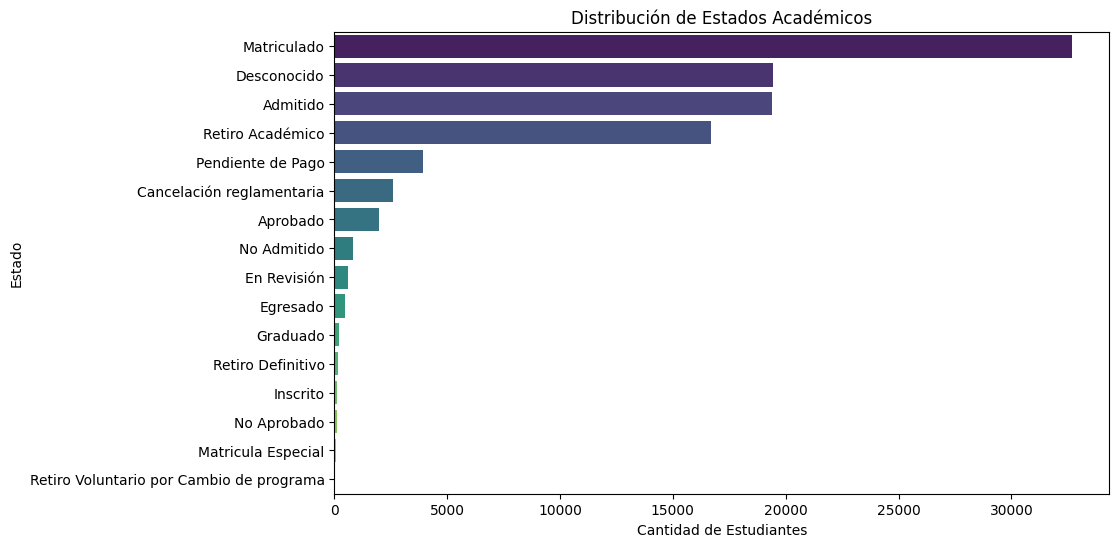

In [37]:
# Frecuencia de cada estado académico
print("\nFrecuencia de cada estado académico:\n", datosl['Estado'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=datosl, y='Estado', order=datosl['Estado'].value_counts().index, palette='viridis')
plt.title('Distribución de Estados Académicos')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Estado')
plt.show()

In [38]:
# --- 15. Análisis de Deserción en Relación con Variables ---
print("\n--- 15. Análisis de Deserción en Relación con Variables ---")


--- 15. Análisis de Deserción en Relación con Variables ---


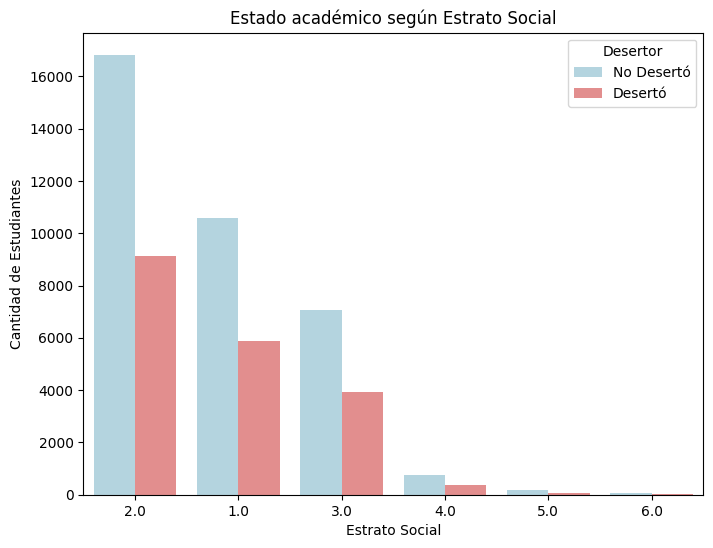

In [39]:
# Deserción según Estrato Social
plt.figure(figsize=(8, 6))
sns.countplot(data=datosl.dropna(subset=['Estrato social', 'desertor']), x='Estrato social', hue='desertor',
              palette=['lightblue', 'lightcoral'],
              order=datosl['Estrato social'].value_counts().index)
plt.title('Estado académico según Estrato Social')
plt.xlabel('Estrato Social')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Desertor', labels=['No Desertó', 'Desertó'])
plt.show()

In [40]:
# Simplificación de la columna 'forma_de_pago'
print("\nValores únicos en la columna 'forma_de_pago':\n", datosl['forma_de_pago'].unique())

def categorizar_pago(fp):
    if pd.isna(fp):
        return 'Desconocido'
    fp = str(fp).upper()
    if 'RECURSOS PROPIOS' in fp or 'SALDO A FAVOR' in fp or 'CESANTÍAS' in fp or 'DEDUCCION POR NOMINA' in fp:
        return 'Recursos Propios'
    elif 'ICETEX' in fp:
        return 'ICETEX'
    elif 'SAPIENCIA' in fp:
        return 'Sapiencia'
    elif 'MATRICULA CERO' in fp or 'POLITICA DE GRATUIDAD - MEN' in fp:
        return 'Matrícula Cero'
    elif 'PRESUPUESTO PARTICIPATIVO' in fp:
        return 'Presupuesto Participativo'
    elif any(org in fp for org in ['COOPETRABAN', 'CONFECOOP', 'FUNDACION', 'MICROEMPRESAS', 'EMPRESAS']):
        return 'Fondos Empresas/Cooperativas/Fundaciones'
    elif 'GENERACION E - MEN' in fp:
        return 'Generación E - MEN'
    else:
        return 'Otros Subsidios'

datosl['forma_de_pago_simplificada'] = datosl['forma_de_pago'].apply(categorizar_pago)
print("\nDistribución de 'forma_de_pago_simplificada':\n", datosl['forma_de_pago_simplificada'].value_counts())


Valores únicos en la columna 'forma_de_pago':
 ['RECURSOS PROPIOS' 'PRESUPUESTO PARTICIPATIVO' 'FONDO EPM - COMFAMA'
 'ICETEX - LINEAS TRADICIONALES'
 'ICETEX - FONDOS CAMINO A LA EDUCACIÓN SUPERIOR PP'
 'ICETEX - FONDO POBLACION VICTIMA MEN'
 'ICETEX - FONDO COPIDROGAS SUPERIOR'
 'SAPIENCIA - PRESUPUESTO PARTICIPATIVO' 'MUNICIPIO DE ITAGUI'
 'SAPIENCIA - MEJORES BACHILLERES' 'SUPERE - MUNICIPIO DE ENVIGADO'
 'COONORTE LTDA, COONORTE LTDA - SEGURO ESTUDIANTIL' 'COOPETRABAN'
 'CORPORACION GILBERTO ECHEVERRI MEJIA' 'FUNDACION FRATERNIDAD MEDELLIN'
 'COOSANLUIS' 'FUNDACION FOMENTO A LA EDUCACION J.C.H.' 'CONFECOOP'
 'CESANTÍAS'
 'MICROEMPRESAS, MICROEMPRESAS - CARNÉ, MICROEMPRESAS - SEGURO Y CARNÉ'
 'MICROEMPRESAS' 'OLIMPIADAS, PRESUPUESTO PARTICIPATIVO' 'BOOTCAMP'
 'BOOTCAMP, MICROEMPRESAS' 'SAPIENCIA 189 - 20182' 'SAPIENCIA 301 - 20191'
 'SAPIENCIA 097 - 20172' 'SAPIENCIA 137 - 20181'
 'MICROEMPRESAS, MICROEMPRESAS - SEGURO Y CARNÉ' 'SAPIENCIA 097 - 20181'
 'SAPIENCIA 137 - 20182' 'FUN

In [41]:
# Tasa de deserción por forma de pago simplificada
tasa_desercion_pago = datosl.dropna(subset=['desertor', 'forma_de_pago_simplificada']).groupby('forma_de_pago_simplificada')['desertor'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
tasa_desercion_pago.rename(columns={'mean': 'tasa_desercion', 'count': 'cantidad'}, inplace=True)
print("\nTasa de deserción por forma de pago simplificada:\n", tasa_desercion_pago)


Tasa de deserción por forma de pago simplificada:
                                           tasa_desercion  cantidad
forma_de_pago_simplificada                                        
Matrícula Cero                                  0.475649     10287
Generación E - MEN                              0.462791       430
Sapiencia                                       0.424346      7911
Presupuesto Participativo                       0.325675      4701
Recursos Propios                                0.320387     28528
Fondos Empresas/Cooperativas/Fundaciones        0.316901       568
ICETEX                                          0.172414        29
Otros Subsidios                                 0.055736      2458


<ipython-input-42-e1d99f040a14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasa_desercion_pago.index, y='tasa_desercion', data=tasa_desercion_pago, palette='rocket')


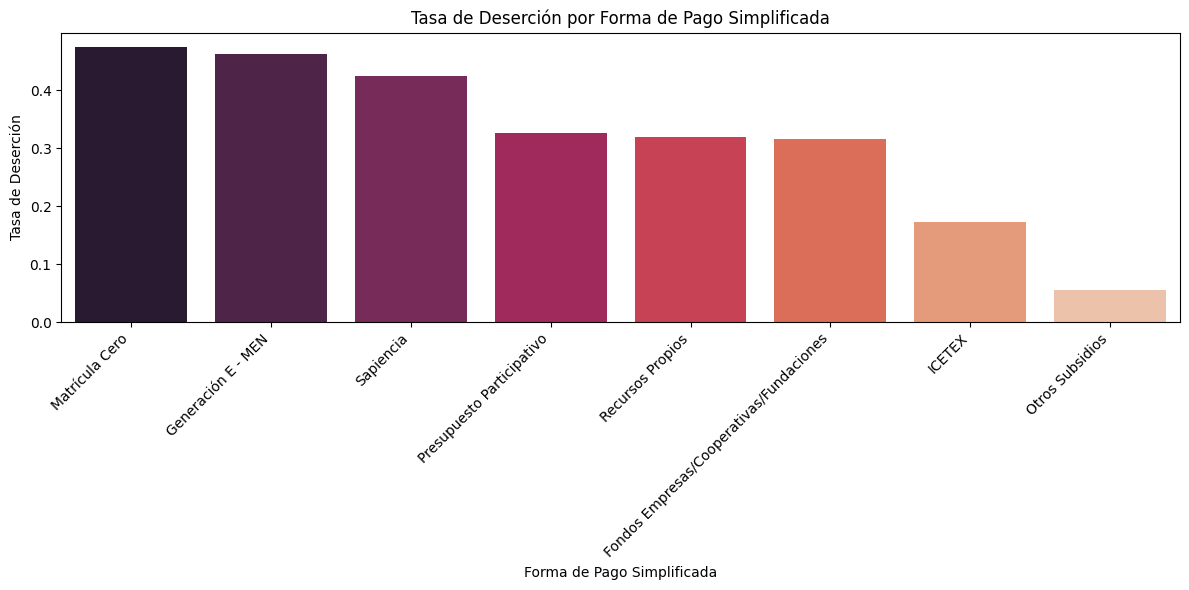

In [42]:

# Visualización de la tasa de deserción por forma de pago
plt.figure(figsize=(12, 6))
sns.barplot(x=tasa_desercion_pago.index, y='tasa_desercion', data=tasa_desercion_pago, palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Forma de Pago Simplificada')
plt.ylabel('Tasa de Deserción')
plt.title('Tasa de Deserción por Forma de Pago Simplificada')
plt.tight_layout()
plt.show()

In [43]:
#continuará


#Correlaciones


--- Continuación del Análisis: Correlación con la Variable de Estudio (Deserción) ---

--- 16. Análisis de Correlación con Variables Numéricas ---


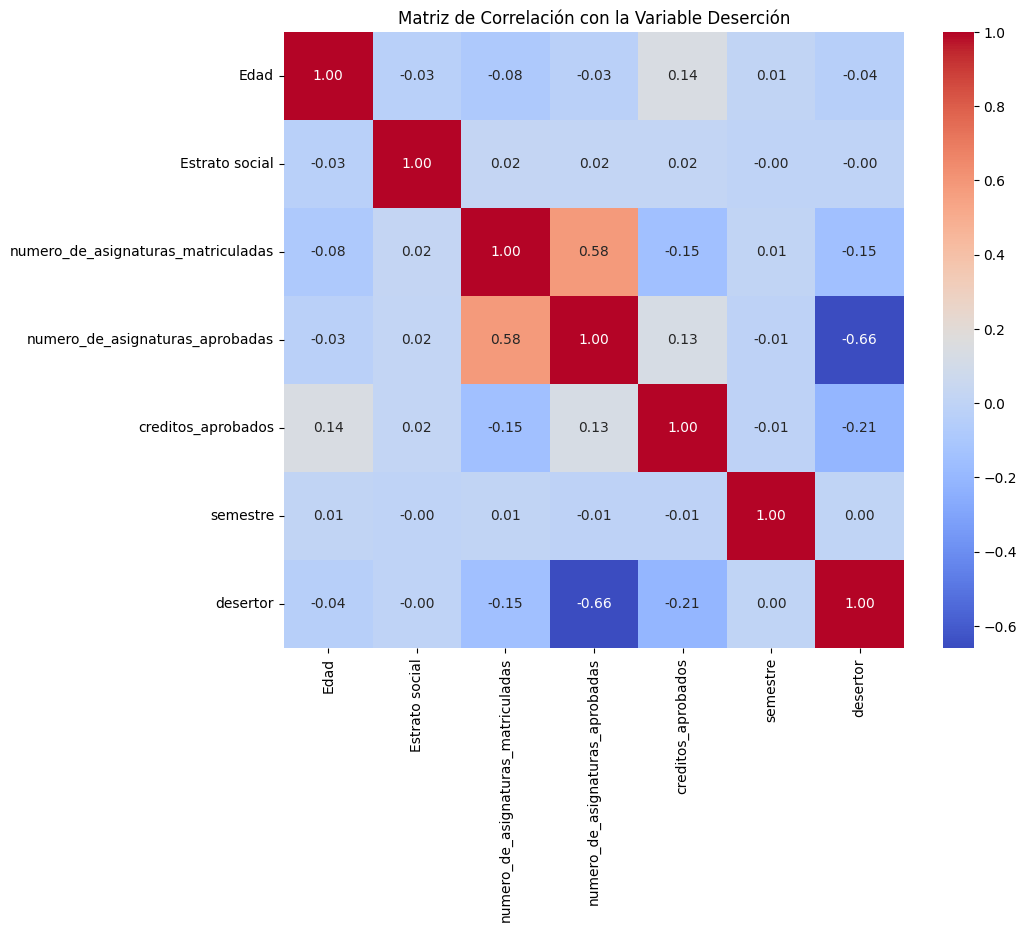


Correlaciones con la variable 'desertor':
 desertor                              1.000000
semestre                              0.003713
Estrato social                       -0.004905
Edad                                 -0.043346
numero_de_asignaturas_matriculadas   -0.147823
creditos_aprobados                   -0.208109
numero_de_asignaturas_aprobadas      -0.659985
Name: desertor, dtype: float64

--- 17. Análisis de Deserción en Relación con Otras Variables Categóricas ---

Tasa de deserción por 'Tipo de programa':
                    tasa_desercion  cantidad
Tipo de programa                           
Virtual                  0.607791      2259
Presencial               0.348591     50030
Regionalización          0.243036      2477
Descentralización        0.184932       146


<ipython-input-44-078f382fe207>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_por_categoria.index, y='tasa_desercion', data=desercion_por_categoria, palette='viridis')


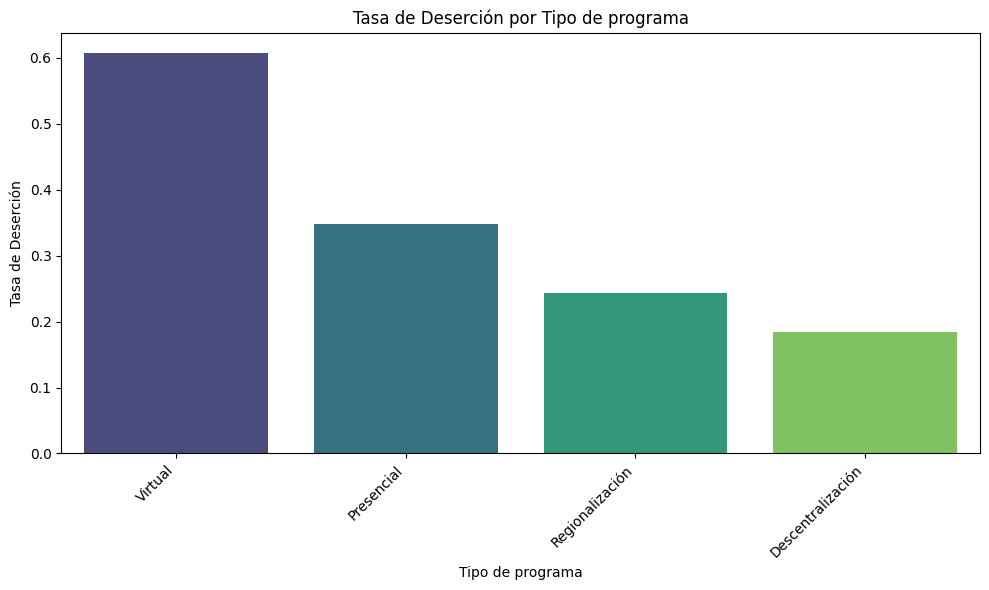


Tasa de deserción por 'jornada':
                tasa_desercion  cantidad
jornada                                
VIRTUAL              0.611186      2235
DIURNA               0.356497     25759
NOCTURNA             0.353871     22528
FIN DE SEMANA        0.244086      2663
JORNADA ÚNICA        0.156920      1727


<ipython-input-44-078f382fe207>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_por_categoria.index, y='tasa_desercion', data=desercion_por_categoria, palette='viridis')


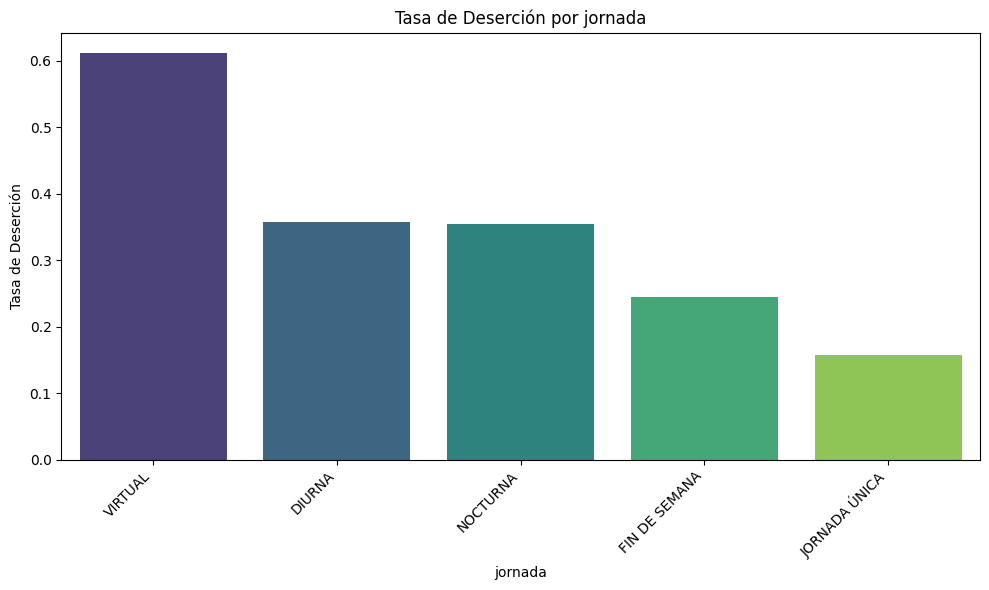


Tasa de deserción por 'Autoreconocimiento étnico':
                            tasa_desercion  cantidad
Autoreconocimiento étnico                          
Indigena                         0.425532       235
Malayo                           0.400000        20
Mongoloide                       0.400000        20
Indígena                         0.394872       195
Raizal                           0.387097        62
Americano                        0.368372      1075
Mestizo(Mayoria Colombia)        0.354474     45490
Afrodescendiente                 0.347192      4113
Caucasico                        0.344734      3684
Rrom o Gitano                    0.333333        18


<ipython-input-44-078f382fe207>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_por_categoria.index, y='tasa_desercion', data=desercion_por_categoria, palette='viridis')


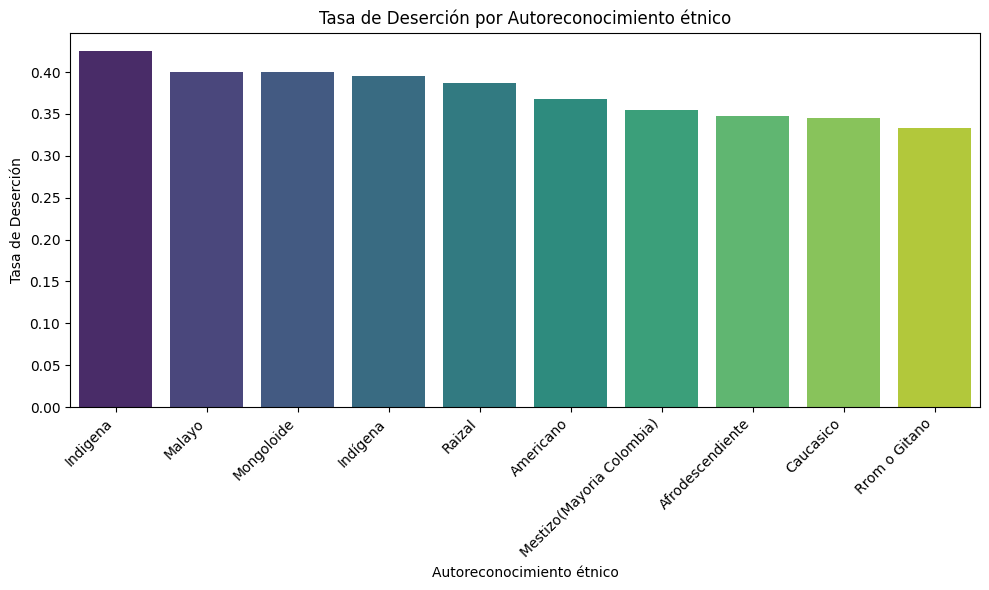

Error: La columna 'género' o 'desertor' no existen en el DataFrame.

Tasa de deserción por 'Víctima de conflicto armado':
                              tasa_desercion  cantidad
Víctima de conflicto armado                          
SI                                 0.411342      4038
NO                                 0.363612     48901
Desconocido                        0.000000      1973


<ipython-input-44-078f382fe207>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_por_categoria.index, y='tasa_desercion', data=desercion_por_categoria, palette='viridis')


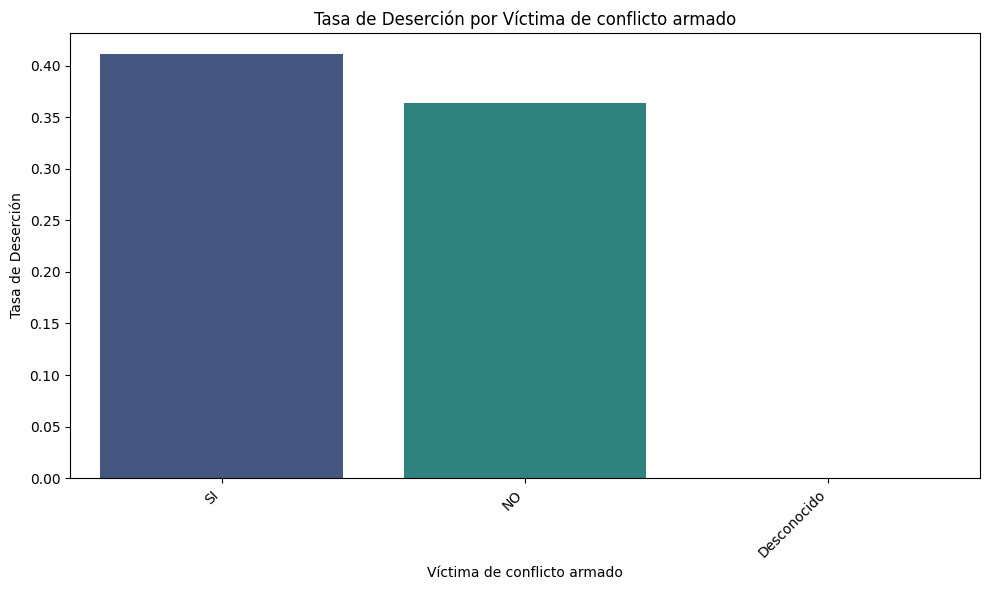


Tasa de deserción por 'nivel':
              tasa_desercion  cantidad
nivel                                
1.0                0.439483     24274
2.0                0.365580      8373
3.0                0.316386      5645
4.0                0.286444      4308
7.0                0.277344       512
5.0                0.270527      3471
6.0                0.263585      5171
9.0                0.245734       293
8.0                0.227679       448
10.0               0.168919       444
Desconocido        0.000000      1973


<ipython-input-44-078f382fe207>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=desercion_por_categoria.index, y='tasa_desercion', data=desercion_por_categoria, palette='viridis')


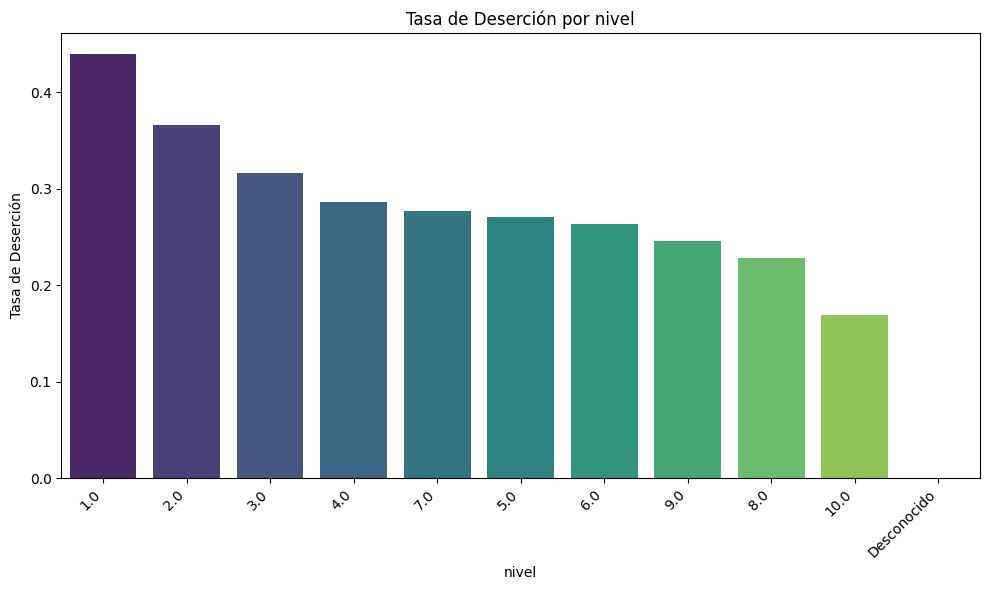


--- 18. Consideraciones Adicionales y Próximos Pasos ---

Consideraciones:
- La correlación lineal entre las variables numéricas y la deserción parece ser débil, lo que sugiere que la deserción puede estar influenciada por factores más complejos o interacciones entre variables.
- El análisis por categorías revela posibles diferencias en las tasas de deserción entre los diferentes grupos.
- Es importante recordar que la imputación de valores faltantes puede influir en los resultados. Si el porcentaje de datos faltantes en algunas columnas era significativo, los análisis deben interpretarse con cautela.
- La definición de 'desertor' se basó en un conjunto específico de estados académicos. Cambiar esta definición podría alterar los resultados.

Próximos Pasos:
- **Modelado Predictivo:** Construir modelos de clasificación (e.g., regresión logística, árboles de decisión, random forest) para predecir la probabilidad de deserción de un estudiante en función de las variables disponibles.
- **

In [44]:
# --- Continuación del Análisis: Correlación con la Variable de Estudio (Deserción) ---
print("\n--- Continuación del Análisis: Correlación con la Variable de Estudio (Deserción) ---")

# --- 16. Análisis de Correlación con Variables Numéricas ---
print("\n--- 16. Análisis de Correlación con Variables Numéricas ---")
# Seleccionar variables numéricas para el análisis de correlación
numerical_cols_for_corr = ['Edad', 'Estrato social', 'numero_de_asignaturas_matriculadas', 'numero_de_asignaturas_aprobadas', 'creditos_aprobados', 'semestre']

# Calcular la matriz de correlación incluyendo la variable 'desertor' (convertida a numérica)
correlation_matrix = datosl[numerical_cols_for_corr + ['desertor']].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación con la Variable Deserción')
plt.show()

# Imprimir las correlaciones con la variable 'desertor'
print("\nCorrelaciones con la variable 'desertor':\n", correlation_matrix['desertor'].sort_values(ascending=False))

# --- 17. Análisis de Deserción en Relación con Otras Variables Categóricas ---
print("\n--- 17. Análisis de Deserción en Relación con Otras Variables Categóricas ---")

# Función para analizar la deserción por variable categórica
def analizar_desercion_por_categoria(df, columna):
    """Analiza la tasa de deserción por cada categoría de una columna dada."""
    if columna not in df.columns or 'desertor' not in df.columns:
        print(f"Error: La columna '{columna}' o 'desertor' no existen en el DataFrame.")
        return

    desercion_por_categoria = df.dropna(subset=[columna, 'desertor']).groupby(columna)['desertor'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
    desercion_por_categoria.rename(columns={'mean': 'tasa_desercion', 'count': 'cantidad'}, inplace=True)
    print(f"\nTasa de deserción por '{columna}':\n", desercion_por_categoria)

    # Visualización
    plt.figure(figsize=(10, 6))
    sns.barplot(x=desercion_por_categoria.index, y='tasa_desercion', data=desercion_por_categoria, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(columna)
    plt.ylabel('Tasa de Deserción')
    plt.title(f'Tasa de Deserción por {columna}')
    plt.tight_layout()
    plt.show()

# Analizar la deserción por 'Tipo de programa'
analizar_desercion_por_categoria(datosl, 'Tipo de programa')

# Analizar la deserción por 'Jornada'
analizar_desercion_por_categoria(datosl, 'jornada')

# Analizar la deserción por 'Autoreconocimiento étnico'
analizar_desercion_por_categoria(datosl, 'Autoreconocimiento étnico')

# Analizar la deserción por 'Género'
analizar_desercion_por_categoria(datosl, 'género')

# Analizar la deserción por 'Víctima de conflicto armado'
analizar_desercion_por_categoria(datosl, 'Víctima de conflicto armado')

# Analizar la deserción por 'Nivel'
analizar_desercion_por_categoria(datosl, 'nivel')

# --- 18. Consideraciones Adicionales y Próximos Pasos ---
print("\n--- 18. Consideraciones Adicionales y Próximos Pasos ---")

print("\nConsideraciones:")
print("- La correlación lineal entre las variables numéricas y la deserción parece ser débil, lo que sugiere que la deserción puede estar influenciada por factores más complejos o interacciones entre variables.")
print("- El análisis por categorías revela posibles diferencias en las tasas de deserción entre los diferentes grupos.")
print("- Es importante recordar que la imputación de valores faltantes puede influir en los resultados. Si el porcentaje de datos faltantes en algunas columnas era significativo, los análisis deben interpretarse con cautela.")
print("- La definición de 'desertor' se basó en un conjunto específico de estados académicos. Cambiar esta definición podría alterar los resultados.")

print("\nPróximos Pasos:")
print("- **Modelado Predictivo:** Construir modelos de clasificación (e.g., regresión logística, árboles de decisión, random forest) para predecir la probabilidad de deserción de un estudiante en función de las variables disponibles.")
print("- **Análisis de Interacción:** Investigar si existen interacciones significativas entre diferentes variables que influyen en la deserción.")
print("- **Análisis Temporal:** Si se dispusiera de datos longitudinales (seguimiento del historial académico de los estudiantes), se podría realizar un análisis de supervivencia para comprender mejor el momento y los factores de riesgo de la deserción.")
print("- **Recolección de Datos Adicionales:** Considerar la posibilidad de recopilar información adicional que pueda ser relevante para la deserción (e.g., factores socioeconómicos detallados, motivación del estudiante, participación en actividades extracurriculares).")
print("- **Validación de Resultados:** Validar los hallazgos en un conjunto de datos independiente si estuviera disponible.")

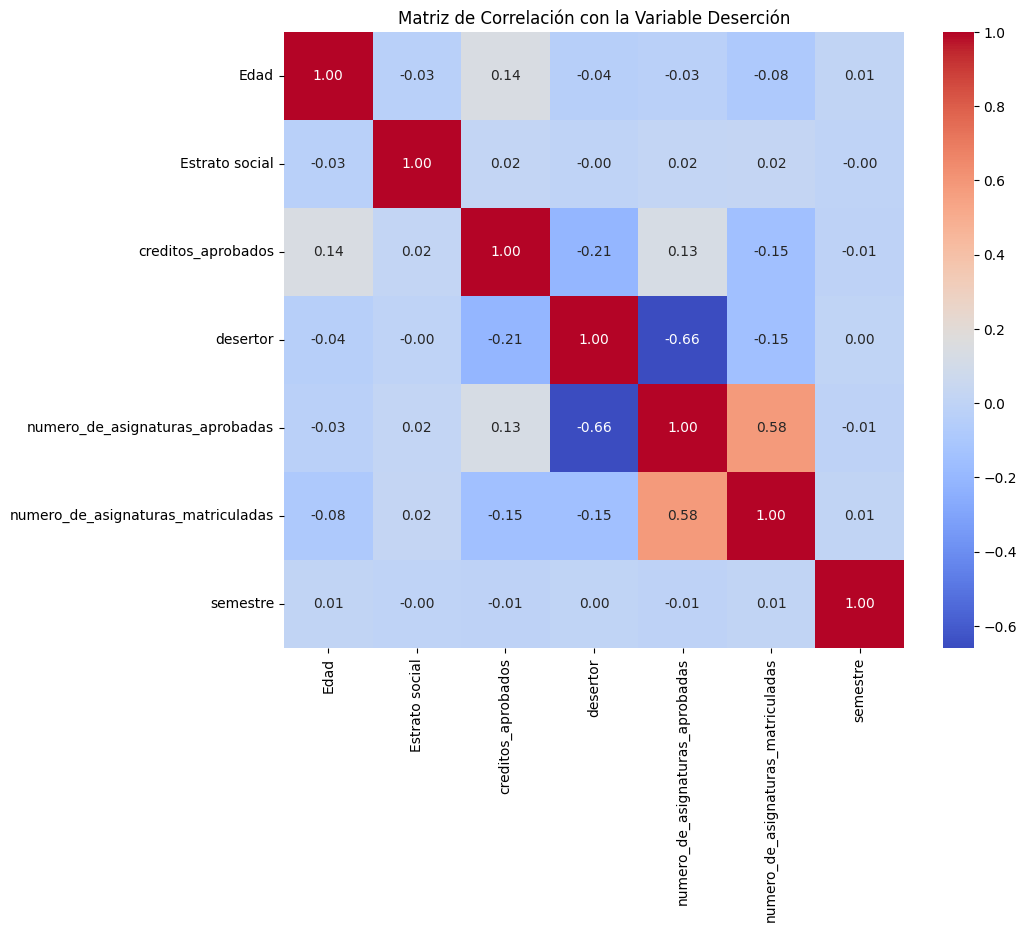


Correlaciones con la variable 'desertor':
 desertor                              1.000000
semestre                              0.003713
Estrato social                       -0.004905
Edad                                 -0.043346
numero_de_asignaturas_matriculadas   -0.147823
creditos_aprobados                   -0.208109
numero_de_asignaturas_aprobadas      -0.659985
Name: desertor, dtype: float64


In [45]:
#Matriz general de correlación
numerical_cols = datosl.select_dtypes(include=np.number).columns

correlation_matrix = datosl[numerical_cols.union(['desertor'])].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación con la Variable Deserción')
plt.show()

print("\nCorrelaciones con la variable 'desertor':\n", correlation_matrix['desertor'].sort_values(ascending=False))

In [50]:
datosl = datosl.reset_index(drop=True)

In [51]:
datosl.shape[0]

99350